# Running training in 2019 and 2020

> [https://github.com/BMClab/covid19](https://github.com/BMClab/covid19)  
> [Laboratory of Biomechanics and Motor Control](http://pesquisa.ufabc.edu.br/bmclab/)  
> Federal University of ABC, Brazil

**The data used in this Jupyter notebook are available on the Figshare repository https://doi.org/10.6084/m9.figshare.16620238.**

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Environment" data-toc-modified-id="Environment-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Environment</a></span></li><li><span><a href="#Helping-functions" data-toc-modified-id="Helping-functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Helping functions</a></span></li></ul></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load dataset</a></span><ul class="toc-item"><li><span><a href="#Basic-information-about-the-dataset" data-toc-modified-id="Basic-information-about-the-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Basic information about the dataset</a></span></li></ul></li><li><span><a href="#Load-dataset-with-indexes-of-policy-responses-to-the-coronavirus-pandemic" data-toc-modified-id="Load-dataset-with-indexes-of-policy-responses-to-the-coronavirus-pandemic-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load dataset with indexes of policy responses to the coronavirus pandemic</a></span></li><li><span><a href="#Running-activity" data-toc-modified-id="Running-activity-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Running activity</a></span><ul class="toc-item"><li><span><a href="#Number-of-running-activities-per-period" data-toc-modified-id="Number-of-running-activities-per-period-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Number of running activities per period</a></span></li></ul></li><li><span><a href="#Data-distribution" data-toc-modified-id="Data-distribution-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data distribution</a></span><ul class="toc-item"><li><span><a href="#Difference-between-2020-and-2019" data-toc-modified-id="Difference-between-2020-and-2019-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Difference between 2020 and 2019</a></span></li><li><span><a href="#Histrogram" data-toc-modified-id="Histrogram-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Histrogram</a></span></li></ul></li><li><span><a href="#Volume-of-training:-average-and-95%-confidence-interval" data-toc-modified-id="Volume-of-training:-average-and-95%-confidence-interval-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Volume of training: average and 95% confidence interval</a></span><ul class="toc-item"><li><span><a href="#Calculus-of-central-tendency-and-confidence-interval-for-each-year" data-toc-modified-id="Calculus-of-central-tendency-and-confidence-interval-for-each-year-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Calculus of central tendency and confidence interval for each year</a></span></li><li><span><a href="#Calculate-differences-between-years" data-toc-modified-id="Calculate-differences-between-years-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Calculate differences between years</a></span><ul class="toc-item"><li><span><a href="#Statistical-inference" data-toc-modified-id="Statistical-inference-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Statistical inference</a></span></li></ul></li><li><span><a href="#Plots" data-toc-modified-id="Plots-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Infographic" data-toc-modified-id="Infographic-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Infographic</a></span></li></ul></li></ul></li></ul></div>

## Setup

In [1]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm
from spm1d.stats import ttest_paired, ttest2, _spm
import matplotlib.patches as patches
%load_ext watermark  

%watermark
%watermark --iversions

Last updated: 2021-09-16T20:24:56.005941-03:00

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 7.27.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.11.0-34-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

numpy     : 1.20.3
autopep8  : 1.5.6
matplotlib: 3.4.3
sys       : 3.8.12 | packaged by conda-forge | (default, Sep 16 2021, 02:08:29) 
[GCC 9.4.0]
spm1d     : 0.4.0
seaborn   : 0.11.2
pandas    : 1.3.3
json      : 2.0.9
tqdm      : 4.62.2



### Environment

In [2]:
path2 = r'./../data/'

pd.set_option('display.float_format', lambda x: '%.4g' % x)
plt.rcParams.update({'font.size': 14, 'xtick.labelsize': 12,
                     'ytick.labelsize': 12})

sns.set_style('whitegrid', rc={'xtick.bottom': True, 'xtick.top': True,
                               'ytick.left': True,
              'ytick.right': True, 'xtick.direction': 'in',
                               'ytick.direction': 'in'})

# plot colors
colors = sns.color_palette()
display(colors)
c1 = colors[0]
c2 = colors[3]
c3 = 'k'
c4 = colors[2]
c5 = colors[1]
# feature (dependent variable)
variables, units = ['distance', 'duration'], ['km', 'min']
freq = 'w'
freq_s = 'week'
# confidence interval
estimate = np.mean
level = 99
method = 'normal'
method = 'bootstrap'  # use to generate the final figures in paper, but much slower
# Statistics
alpha = 0.01
two_tailed = True
spmtest = ttest_paired
#spmtest = wilcoxon
# other variables:
ages = ['18 - 34', '35 - 54', '55 +']
genders = ['F', 'M']
years = ['2019', '2020']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
freqs = ['d', 'w', 'm']
freqs_s = ['day', 'week', 'month']

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### Helping functions

In [3]:
def ci_calc(y, estimate=np.nanmean, level=95, axis=0, method='bootstrap',
            n_boot=1000, n=None, seed=None):
    """Calculate `level`% confidence interval of the `estimate` for `y`.

    Parameters
    ----------
    y : 1-d or 2-d array_like
        Calculate the confidence interval of these values.
    estimate : numpy function (optional, default=np.nanmean)
        Function (unknown parameter) to which the confidence interval will be
        estimated
    level : number (optional, default=95)
        Confidence level (in %, in the interval ]0, 100[) of the confidence
        interval
    axis : int (optional, default=0)
        Axis of y which the confidence interval will be estimated
    method: string (optional, default=`'bootstrap'`)
        Valid options: `'bootstrap'`, `'bootstrap_sns'` (Seaborn), `'normal'`.
        `'normal'` method calculates confidence interval for the `'estimate'`
        of `y` assuming normal distribution and unknown mean and unknown
        standard deviation.
        `'bootstrap'` and `'bootstrap_sns'` methods calculate confidence
        interval for the `estimate` of `y` by percentile bootstrap.
    n_boot : int (optional, default=1000)
        Number of bootstrap iteractions
    n : {None, int} (optional, default=None)
        Number of samples to bootstrap (only works with method `'bootstrap'`)
    seed : {None, int, ..., Generator} (optional, default=None)
        Seed for the random number generator

    Returns
    -------
    confidence interval : 1-d or 2-d array_like

    Example
    -------
    >>> rng = np.random.default_rng(12345)
    >>> y = 1 + rng.standard_normal(size=(10000, 4))
    >>> ci_calc(y, method='bootstrap', seed=rng)
    array([[0.98543573, 0.97812353, 0.99513357, 0.98174334],
           [1.02535726, 1.01852985, 1.03386319, 1.02152344]])

    >>> ci_calc(y, method='normal')
    array([[0.98530252, 0.97851995, 0.99611958, 0.98188726],
           [1.02378054, 1.01758363, 1.03539235, 1.02153012]])

    See Also
    --------
    https://github.com/BMClab/BMC/blob/master/notebooks/ConfidencePredictionIntervals.ipynb
    https://stats.stackexchange.com/questions/355781/
    """
    if method == 'bootstrap':
        rng = np.random.default_rng(seed=seed).integers
        if n is None:
            n = y.shape[axis]
        boots = [estimate(y.take(rng(y.shape[axis], size=n), axis=axis),
                          axis=axis) for i in range(n_boot)]
        ci = np.percentile(boots, [(100-level)/2, (100+level)/2], axis=0)
    elif method == 'bootstrap_sns':            
        import seaborn as sns
        ci = sns.utils.ci(sns.algorithms.bootstrap(y, n_boot=n_boot, axis=axis,
                                                   units=None, func=estimate,
                                                   seed=seed),
                          which=level, axis=axis)
    elif method == 'normal':
        from scipy import stats
        n = y.shape[axis]
        tppf = stats.t.ppf((1+level/100)/2, n-1)
        std = np.nanstd(y, axis=axis, ddof=1)
        ci = estimate(y, axis=axis) + tppf * np.array([-std, std])/np.sqrt(n)
    else:
        raise Exception('Unknown method for calculating ci: {}.'.format(method))

    return ci


def m_ci(x=None, estimate=np.nanmedian, level=95, method='bootstrap'):
    """Return array with median and level% confidence interval."""
    ci = ci_calc(x, estimate=estimate, level=level, method=method)
    return np.r_[estimate(x), ci[0], ci[1]]


def m_cidf(y, estimate=np.nanmedian, level=level, method='bootstrap'):
    y = y.groupby(by='datetime', axis='index').apply(lambda x: m_ci(x, estimate,
                                                                    level, method))
    y = pd.DataFrame(y.values.tolist(), index=y.index,
                     columns=['m', 'ci_inf', 'ci_sup'])
    return y

## Load dataset

Let's load the dataset and create a dictionary with all the data and grouped by gender and age.  
We will also create two equivalents dictionaries with the number of athletes per period and the number of activities per athlete.

In [4]:
dfs, dfs0, nathletes, nruns = dict(), dict(), dict(), dict()
for year in years:
    for f, frq in enumerate(freqs):
        fname = 'run_ww_{}_{}.parquet'.format(year, frq)
        df = pd.read_parquet(os.path.join(path2, fname))
        df['athlete'] = df['athlete'].astype('category')  # bug in parquet
        df = df.set_index('datetime', drop=True)
        #df.index = df.index.normalize()
        display(df.iloc[[0, -1]].style.set_caption(
            'Year: {}, Frequency: {} (first and last rows)'.format(
                year, freqs_s[f])))
        dfs[year, frq] = df
        dfs0[year, frq] = df[df[variables[0]] > 0]
        nathletes[year, frq] = dfs0[year, frq].groupby(level='datetime').size()
        x = dfs0[year, frq].groupby('athlete').size()
        nruns[year, frq] = x[x > 0]  # removes athletes with zero runs
        for gender in genders:
            for age in ages:
                x = dfs0[year, frq][(dfs0[year, frq]['gender'] == gender) &
                                     (dfs0[year, frq]['age_group'] == age)] 
                nathletes[year, frq, gender, age] = x.groupby(level='datetime').size()
                x = x.groupby('athlete').size()
                nruns[year, frq, gender, age] = x[x > 0]  # removes athletes with zero runs

,athlete,distance,duration,gender,age_group,country,major
datetime,,,,,,,
2019-01-01 00:00:00,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019
2019-12-31 00:00:00,37598,25.670000,223.000000,M,35 - 54,China,TOKYO 2012


,athlete,distance,duration,gender,age_group,country,major
datetime,,,,,,,
2019-01-01 00:00:00,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019
2019-12-24 00:00:00,37598,46.077500,322.947917,M,35 - 54,China,TOKYO 2012


,athlete,distance,duration,gender,age_group,country,major
datetime,,,,,,,
2019-01-31 00:00:00,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019
2019-12-31 00:00:00,37598,297.745161,2378.951613,M,35 - 54,China,TOKYO 2012


,athlete,distance,duration,gender,age_group,country,major
datetime,,,,,,,
2020-01-01 00:00:00,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019
2020-12-31 00:00:00,37598,10.620000,71.000000,M,35 - 54,China,TOKYO 2012


,athlete,distance,duration,gender,age_group,country,major
datetime,,,,,,,
2020-01-01 00:00:00,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019
2020-12-23 00:00:00,37598,102.052222,847.220370,M,35 - 54,China,TOKYO 2012


,athlete,distance,duration,gender,age_group,country,major
datetime,,,,,,,
2020-01-31 00:00:00,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019
2020-12-31 00:00:00,37598,377.719355,2842.564516,M,35 - 54,China,TOKYO 2012


### Basic information about the dataset

In [5]:
dfs['2019', 'd'].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13290380 entries, 2019-01-01 to 2019-12-31
Data columns (total 7 columns):
 #   Column     Dtype   
---  ------     -----   
 0   athlete    category
 1   distance   float64 
 2   duration   float64 
 3   gender     category
 4   age_group  category
 5   country    category
 6   major      category
dtypes: category(5), float64(2)
memory usage: 432.4 MB


In [6]:
for year in years:
    print('Year: {}'.format(year))
    nday = dfs[year, 'd'].index.value_counts().size
    print(' Number of days:', nday)
    nathlete = nruns[year, 'd'].size
    print(' Number of athletes:', nathlete)
    nactivity = dfs[year, 'd'].shape[0]
    print(' Total number of activities:', nactivity)
    nactivity = nathletes[year, 'd'].sum()
    print(' Actual number of running activities:', nactivity)
print('Number of running activities in 2019 and 2020:',
      nathletes['2019', 'd'].sum() + nathletes['2020', 'd'].sum())

Year: 2019
 Number of days: 365
 Number of athletes: 36412
 Total number of activities: 13290380
 Actual number of running activities: 4677389
Year: 2020
 Number of days: 366
 Number of athletes: 35083
 Total number of activities: 13326792
 Actual number of running activities: 4581764
Number of running activities in 2019 and 2020: 9259153


In [7]:
nathletes['2019', 'd'].sum() + nathletes['2020', 'd'].sum()

9259153

In [8]:
dfs0['2019', 'd'].shape[0] + dfs0['2020', 'd'].shape[0]

9259153

In [9]:
nruns['2019', 'd'].sum() + nruns['2020', 'd'].sum()

9259153

## Load dataset with indexes of policy responses to the coronavirus pandemic

In [10]:
c19idx = pd.read_csv(os.path.join(path2, 'policy_response_indexes.csv'), sep=',',
                 header=0, parse_dates=['date'], verbose=False)
c19idx = c19idx.set_index('date', drop=True)
c19idx

,si_w,ci_w,hi_w,wi_w
date,,,,
2020-01-01,0.04731,0.2352,0,0
2020-01-02,0.1528,0.3193,0,0
2020-01-03,0.1905,0.3454,0,0
2020-01-04,0.1905,0.3454,0,0
2020-01-05,0.2175,0.4014,0,0
...,...,...,...,...
2020-12-27,70.69,68.08,1.789,2.341
2020-12-28,70.64,68.06,1.789,2.325
2020-12-29,70.62,68.08,1.788,2.325


In [11]:
def correct_last_days(y, freq):
    """
    Change the dates of the last days to avoid a last week with less than 7 days.
    """
    nlastdays = 7 + y.index[-1].dayofyear % 7
    if freq == '7d' and nlastdays > 7:
        ts = pd.Timestamp(y.index[-1].date() - pd.to_timedelta(nlastdays-7, unit='D'))
        y.index = y.index.where(y.index <= ts, ts)    
    grouper = pd.Grouper(axis=0, freq=freq)
    y = y.groupby(grouper).mean()
    if freq == '7d':
        # correct the divisor if the last week doesn't have 7 days
        y.loc[y.index[-1], :] = y.loc[y.index[-1], :] * (7 / nlastdays)
    return y

freq2 = '7d' if freq == 'w' else freq
c19idx = correct_last_days(c19idx, freq2)

## Running activity

In [12]:
nathlete = nruns['2019', 'd'].size
nactivity = nathletes['2019', 'd'].sum() + nathletes['2020', 'd'].sum()

In [13]:
grouper = pd.Grouper(axis=0, freq='y', sort=True)
for year in years:
    print(year)
    display(dfs[year, freq][['distance', 'duration']
                           ].groupby(grouper).describe().stack(level=0))    
    display(dfs[year, freq][['gender', 'age_group', 'distance', 'duration']
                           ].groupby([grouper, 'gender', 'age_group']
                                    ).describe().stack(level=0))

2019


25%   50%   75%     count   max  mean  min   std
datetime                                                              
2019-12-31 distance  1.63  21.6 46.18 1.893e+06 711.1 29.24    0 30.11
           duration 10.75 122.9 254.6 1.893e+06  8239 160.6    0 166.5

25%   50%   75%     count   max  mean  \
datetime   gender age_group                                                    
2019-12-31 F      18 - 34   distance     0 15.81 39.56 2.009e+05 419.7 24.45   
                            duration     0  94.3 228.5 2.009e+05  3442 139.5   
                  35 - 54   distance  4.87  22.7 43.69 2.407e+05 450.4 27.74   
                            duration 30.22 141.4 263.1 2.407e+05  7649   168   
                  55 +      distance  9.67 28.23 46.54 2.059e+04 479.5 30.23   
                            duration    64   187   301 2.059e+04  8239 201.3   
           M      18 - 34   distance     0 19.18 46.85 4.357e+05 510.3 29.55   
                            duration     0 100.5 239.9 4.357e+05  6810 149.9   
                  35 - 54   distance  4.58 23.14 47.89 8.825e+05 711.1 30.41   
                            duration 25.27   129 258.7 8.825e+05  5162 165.1   
                  55 +      distance 6.537 26.06 47.94  1.13e+05 331.4  30.5   
                            duration 41.18 155.1 279.3  1.13e+05  6418 181.1   

                                      min   std  
datetime   gender age_group                      
2019-12-31 F      18 - 34   distance    0 27.52  
                            duration    0 156.4  
                  35 - 54   distance    0 26.33  
                            duration    0 162.1  
                  55 +      distance    0 24.32  
                            duration    0 183.8  
           M      18 - 34   distance    0 33.21  
                            duration    0   170  
                  35 - 54   distance    0 30.37  
                            duration    0 166.7  
                  55 +      distance    0 27.26  
                            duration    0 168.5

2020


25%   50%   75%     count   max  mean  min   std
datetime                                                             
2020-12-31 distance    0 18.06 43.02 1.893e+06 624.6 27.07    0 30.32
           duration    0 103.7 239.4 1.893e+06  6913 149.9    0 167.8

25%   50%   75%     count   max  mean  \
datetime   gender age_group                                                    
2020-12-31 F      18 - 34   distance     0  11.5 35.48 2.009e+05 528.5 22.11   
                            duration     0  70.9 206.3 2.009e+05  6913 126.8   
                  35 - 54   distance     0 19.68 41.92 2.407e+05 579.2 26.07   
                            duration     0   124 253.3 2.407e+05  5408 159.5   
                  55 +      distance  5.27 26.74 46.84 2.059e+04 281.7 30.06   
                            duration 39.57 182.8 309.6 2.059e+04  3285 207.8   
           M      18 - 34   distance     0  15.9 43.42 4.357e+05 476.8 27.46   
                            duration     0 84.61 222.9 4.357e+05  5421 139.5   
                  35 - 54   distance     0 19.39  44.4 8.825e+05 624.6 28.02   
                            duration     0 108.8 242.9 8.825e+05  5065 153.2   
                  55 +      distance 2.876 23.03 45.08  1.13e+05 384.4 28.66   
                            duration 20.31   141 268.4  1.13e+05  3302 173.3   

                                      min   std  
datetime   gender age_group                      
2020-12-31 F      18 - 34   distance    0 27.46  
                            duration    0 158.1  
                  35 - 54   distance    0 27.19  
                            duration    0 167.2  
                  55 +      distance    0 26.71  
                            duration    0 201.4  
           M      18 - 34   distance    0  32.9  
                            duration    0 165.8  
                  35 - 54   distance    0 30.66  
                            duration    0 168.4  
                  55 +      distance    0 28.02  
                            duration    0 173.3

### Number of running activities per period

In [14]:
print('Median and interquartile range of number of days the athletes ran each year:')
for year in years:
    print('In {}: {:.0f} ({:.0f}, {:.0f}) days'.
          format(year, *np.percentile(nruns[year, 'd'], [50, 25, 75]).round()))

Median and interquartile range of number of days the athletes ran each year:
In 2019: 120 (63, 183) days
In 2020: 119 (59, 191) days


The athletes ran on average about once every three days and half of them ran between once every week and once every two days in 2019 and 2020.

## Data distribution

### Difference between 2020 and 2019

In [15]:
d_v = ['d_' + v for v in variables]
dfs['2020', freq][d_v] = ((dfs['2020', freq][variables].values -
                           dfs['2019', freq][variables].values) /
                          estimate(dfs['2019', freq][variables].values)) * 100

In [16]:
display(dfs['2020', freq][d_v].describe().T)
display(dfs['2020', freq][d_v].groupby('datetime').describe())

,count,mean,std,min,25%,50%,75%,max
d_distance,1.893e+06,-2.283,31.02,-734.9,-17.01,0,12.44,569.5
d_duration,1.893e+06,-11.3,181.8,-8006,-94.81,0,72.42,6655


d_distance                                                   \
                count    mean   std    min    25%      50%   75%   max   
datetime                                                                 
2020-01-01  3.641e+04 -0.4711 28.94   -223 -13.98        0 13.09 372.2   
2020-01-08  3.641e+04   -1.03 29.65 -218.3 -15.29        0 12.84 317.6   
2020-01-15  3.641e+04 -0.8422 29.71 -202.4 -14.99        0 13.22 233.4   
2020-01-22  3.641e+04 -0.7946 30.35 -223.5 -15.33        0 13.74 252.9   
2020-01-29  3.641e+04 0.04168 30.29   -217 -13.83        0 14.87 211.5   
2020-02-05  3.641e+04  -1.815  30.9 -196.6 -16.52        0 12.85   249   
2020-02-12  3.641e+04  -1.801 31.33 -215.7 -17.12        0 13.16 206.4   
2020-02-19  3.641e+04  -1.805 31.51 -208.6 -17.02        0 13.34 197.2   
2020-02-26  3.641e+04  -3.006 31.86 -240.8 -18.78        0 12.43   204   
2020-03-04  3.641e+04   -1.77 32.14 -204.7 -17.49        0 13.74   260   
2020-03-11  3.641e+04  -6.264 31.66   -460 -22.43   -1.296 9.559 253.6   
2020-03-18  3.641e+04  -7.281 33.18 -253.5 -24.53   -2.128 10.14 236.5   
2020-03-25  3.641e+04  -5.316 32.38 -381.9 -22.02 -0.03161 11.34 227.2   
2020-04-01  3.641e+04  -3.128 32.18 -536.6  -20.3        0 13.74 569.5   
2020-04-08  3.641e+04  -3.996 32.35 -256.8 -21.26        0 12.91 249.7   
2020-04-15  3.641e+04   5.465 33.05 -422.6  -10.9  0.07902 21.76 261.4   
2020-04-22  3.641e+04  0.3786  32.1 -425.6 -16.59        0 16.81 249.4   
2020-04-29  3.641e+04   4.681  31.1 -441.2 -10.58   0.9799 20.91   238   
2020-05-06  3.641e+04   4.443 30.39   -435 -10.23   0.5268 19.89 272.9   
2020-05-13  3.641e+04   3.512 30.54 -418.2 -11.13        0 18.64 325.4   
2020-05-20  3.641e+04   3.645 31.02 -442.2 -10.66        0 18.53 352.1   
2020-05-27  3.641e+04    3.74  30.4 -441.9 -10.54        0 18.57 562.1   
2020-06-03  3.641e+04   2.146 30.52 -668.6 -11.92        0 16.96 309.2   
2020-06-10  3.641e+04   2.436 30.18   -403 -11.92        0 16.92 282.3   
2020-06-17  3.641e+04  0.9584  30.1 -396.5 -13.29        0  15.5 273.7   
2020-06-24  3.641e+04  0.4992 30.52 -387.6 -13.52        0 14.74 327.6   
2020-07-01  3.641e+04  -1.903 30.51 -233.9 -16.44        0 12.56 269.2   
2020-07-08  3.641e+04  -3.144  31.1 -310.3 -17.97        0 11.49 464.2   
2020-07-15  3.641e+04   -3.28 30.93 -284.9 -17.95        0  11.2 270.5   
2020-07-22  3.641e+04  -5.286 31.73 -230.5 -20.75  -0.4004 9.376 423.3   
2020-07-29  3.641e+04  -6.161 31.84 -322.7 -21.86   -1.475 8.597 405.5   
2020-08-05  3.641e+04   -7.45 31.93 -734.9 -23.25   -3.161 7.048 407.6   
2020-08-12  3.641e+04  -8.168 32.23 -234.1 -24.67   -3.561 6.915 315.8   
2020-08-19  3.641e+04  -8.852 32.16 -318.6 -25.43   -4.662  6.24   297   
2020-08-26  3.641e+04   -9.11 32.05 -261.3 -25.66   -4.536 6.343 215.6   
2020-09-02  3.641e+04  -9.732 32.29   -277 -27.13   -5.268 5.774 406.1   
2020-09-09  3.641e+04  -9.842 32.11 -427.9 -27.14   -5.247 5.468 264.4   
2020-09-16  3.641e+04  -8.234 31.64 -619.7 -24.61   -3.877 6.785 240.6   
2020-09-23  3.641e+04  -10.76 31.43 -376.3 -29.46   -5.753 5.131 255.4   
2020-09-30  3.641e+04  -2.666 31.28 -364.7 -17.63        0 12.06 414.9   
2020-10-07  3.641e+04  -6.814 31.46 -364.3 -23.16   -1.275 8.302 403.3   
2020-10-14  3.641e+04   -2.37 30.09 -340.1 -16.23        0 11.35 266.6   
2020-10-21  3.641e+04    -2.3 29.28 -465.3 -15.77        0 11.06 222.8   
2020-10-28  3.641e+04  -4.861 30.11 -398.4 -19.46        0 9.559   239   
2020-11-04  3.641e+04  0.7343 28.87 -312.3 -11.41        0 14.01 182.3   
2020-11-11  3.641e+04  0.2846 28.11 -240.7 -11.48        0 13.36 324.9   
2020-11-18  3.641e+04  0.1513 28.04 -235.9 -11.72        0 13.02 319.8   
2020-11-25  3.641e+04  0.6412 27.94 -267.3 -10.97        0 13.58 319.4   
2020-12-02  3.641e+04  0.0829 27.94 -250.7 -11.15        0 12.29   403   
2020-12-09  3.641e+04  0.8628 28.07 -266.8 -10.29        0 12.68 363.2   
2020-12-16  3.641e+04  -0.285 28.01 -252.5 -10.93        0 11.05 502.4   
2020-12-23  3.6

### Histrogram

In [17]:
if freq == 'd':
    nrows, ncols = 31, 12
    xmin, xmax = -20, 20
elif freq == 'w':
    nrows, ncols = 8, 7
    xmin, xmax = -50, 50
else:
    nrows, ncols = 4, 3  
    xmin, xmax = -200, 200

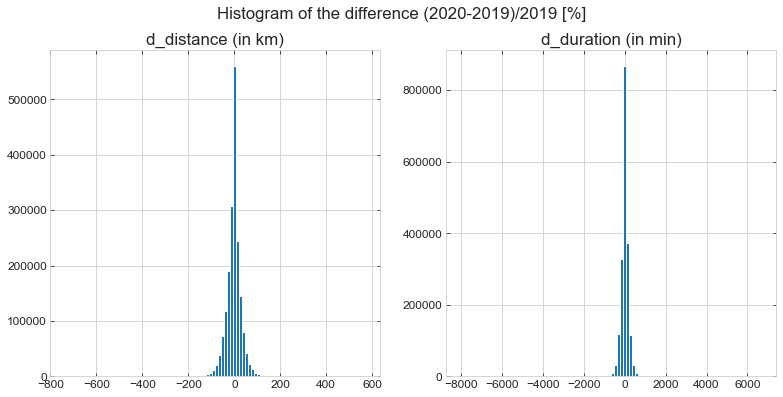

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
for v, var in enumerate(d_v):
    dfs['2020', freq][var].hist(bins=100, ax=ax[v])
    ax[v].set_title('{} (in {})'.format(var, units[v]))
fig.suptitle('Histogram of the difference (2020-2019)/2019 [%]')
plt.show()

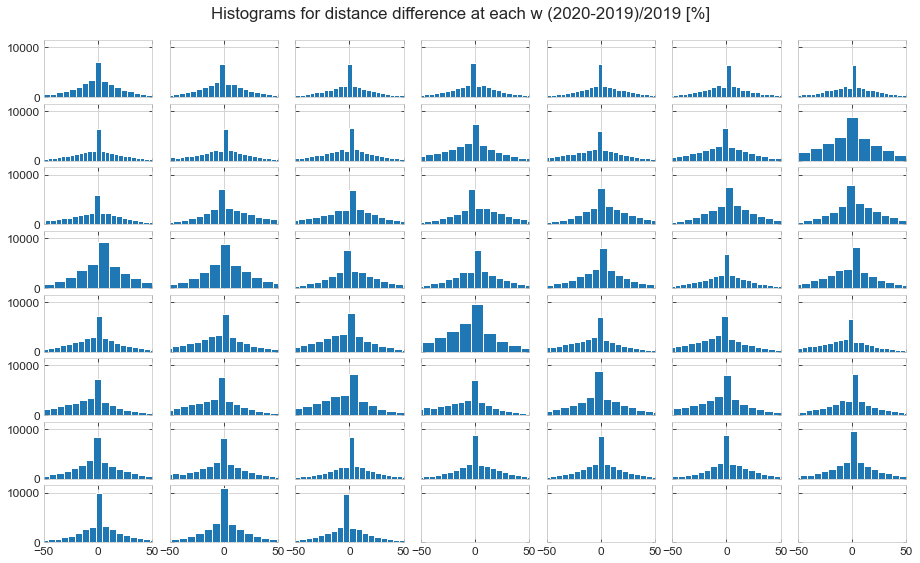

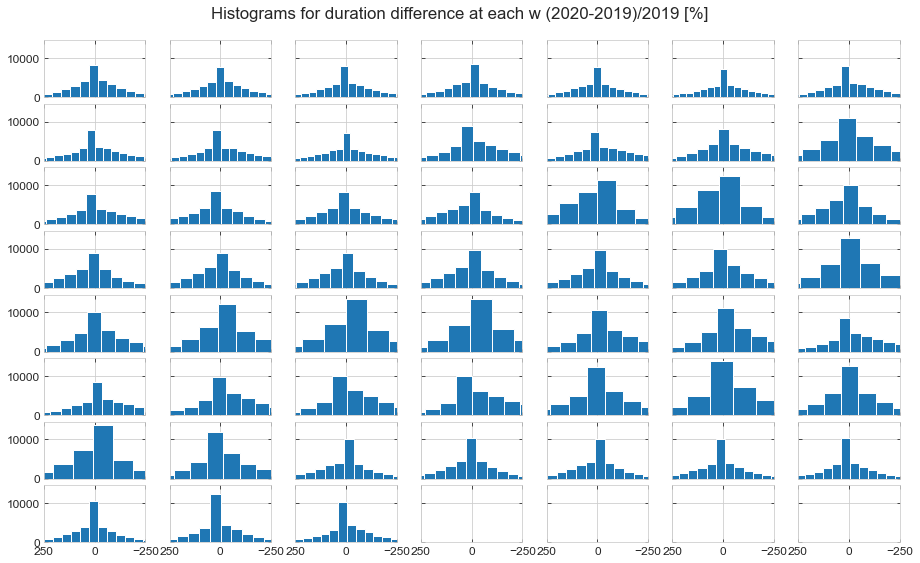

In [19]:
for v, var in enumerate(variables):
    fig, axs = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(13, 8))
    fig.suptitle('Histograms for {} difference at each {} (2020-2019)/2019 [%]'.format(var, freq))
    axs[0, 0].set_xlim(xmin - 6*v*xmin, xmax + 6*v*xmin)
    axs = axs.flatten()
    x = dfs['2020', freq][['athlete', 'd_'+var]].pivot(columns='athlete')['d_'+var].T
    axs = x.hist(bins=100, figsize=(13, 9), ax=axs[:x.shape[1]])
    for ax in axs:
        ax.set_title('')
    plt.tight_layout(h_pad=.05, w_pad=.05)
    plt.show()

## Volume of training: average and 95% confidence interval

### Calculus of central tendency and confidence interval for each year

In [20]:
dfsci, dfs0ci = dict(), dict()

for var in variables:
    for year in years:
        dfsci[year, freq, var] = m_cidf(y=dfs[year, freq][var],
                                        estimate=estimate, level=level, method=method)
        dfs0ci[year, freq, var] = m_cidf(y=dfs0[year, freq][var],
                                         estimate=estimate, level=level, method=method)
        for gender in genders:
            for age in ages:
                x = dfs[year, freq][(dfs[year, freq]['gender'] == gender) &
                                    (dfs[year, freq]['age_group'] == age)][var]
                dfsci[year, freq, gender, age, var] = m_cidf(y=x, estimate=estimate,
                                                             level=level, method=method)
                x = dfs0[year, freq][(dfs0[year, freq]['gender'] == gender) &
                                     (dfs0[year, freq]['age_group'] == age)][var]
                dfs0ci[year, freq, gender, age, var] = m_cidf(y=x, estimate=estimate,
                                                              level=level, method=method)             

### Calculate differences between years

In [21]:
dfscid = dict()
nathletesd = dict()
# store old index
dfs['2019', freq]['index'] = dfs['2019', freq].index
dfs['2020', freq]['index'] = dfs['2020', freq].index
days = np.r_[0, np.cumsum(dfs['2019', 'm'].index.unique().daysinmonth.values)[:]]
# change the index
idx = dfs['2019', freq].index.dayofyear
dfs['2019', freq].index = idx
dfs['2020', freq].index = idx

for var in variables:
    dfscid[freq, var] = m_cidf(100 * ((dfs['2020', freq][var] - dfs['2019', freq][var]) /
                                      estimate(dfs['2019', freq][var])),
                               estimate=estimate, level=level, method=method)

    nathletesd[freq, var] = pd.Series(((nathletes['2020', freq].values - nathletes['2019', freq].values) /
                                     estimate(nathletes['2019', freq])) * 100,
                                     index=dfscid[freq, var].index)

    for gender in genders:
        for age in ages:
            idx = (dfs['2020', freq]['gender'] == gender) & (dfs['2020', freq]['age_group'] == age)
            x = 100 * ((dfs['2020', freq][idx][var] - dfs['2019', freq][idx][var]) /
                       estimate(dfs['2019', freq][idx][var]))
            dfscid[freq, gender, age, var] = m_cidf(x, estimate=estimate, level=level, method=method)   

            nathletesd[freq, gender, age, var] = pd.Series(((nathletes['2020', freq, gender, age].values -  
                                                      nathletes['2019', freq, gender, age].values) /
                                                      estimate(nathletes['2019', freq, gender, age]))
                                                      * 100, index=dfscid[freq, var].index)

In [22]:
for var in variables:
    print(var)
    display(dfscid[freq, var]['m'].describe().to_frame(name='All athletes').T)
    display(nathletesd[freq, var].describe().to_frame(name='N All athletes').T)
    for gender in genders:
        for age in ages:
            display(dfscid[freq, gender, age, var]['m'].describe().to_frame(name=gender + age).T)
            display(nathletesd[freq, gender, age, var].describe().to_frame(name='N All athletes').T)

distance


,count,mean,std,min,25%,50%,75%,max
All athletes,52,-7.411,13.41,-34.92,-17.18,-5.874,1.327,17.74


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-6.539,5.291,-16.02,-9.97,-6.107,-2.143,1.715


,count,mean,std,min,25%,50%,75%,max
F18 - 34,52,-9.586,17,-40.68,-20.87,-8.014,0.3301,27.78


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-8.077,7.806,-21.69,-14.9,-6.087,-1.817,4.796


,count,mean,std,min,25%,50%,75%,max
F35 - 54,52,-5.988,13.98,-34.18,-17.95,-4.602,2.394,24.57


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-6.708,4.979,-16.23,-10.15,-6.863,-2.276,1.531


,count,mean,std,min,25%,50%,75%,max
F55 +,52,-0.5609,12.8,-22.6,-10.95,-1.863,6.997,37.02


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-5.631,4.965,-15.91,-9.179,-6.272,-1.453,5.202


,count,mean,std,min,25%,50%,75%,max
M18 - 34,52,-7.064,14.87,-39.43,-15.4,-5.037,2.515,20.1


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-5.547,6.021,-18.13,-9.488,-3.467,-0.6096,3.931


,count,mean,std,min,25%,50%,75%,max
M35 - 54,52,-7.87,12.46,-33.05,-17.2,-5.939,0.9886,12.34


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-6.887,4.943,-15.8,-9.814,-6.413,-2.583,0.8065


,count,mean,std,min,25%,50%,75%,max
M55 +,52,-6.019,11.97,-28.99,-14.17,-6.03,1.677,19.91


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-4.777,4.173,-11.58,-8.05,-6.11,-1.317,2.085


duration


,count,mean,std,min,25%,50%,75%,max
All athletes,52,-6.678,12.77,-33.41,-16.05,-5.31,1.978,15.91


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-6.539,5.291,-16.02,-9.97,-6.107,-2.143,1.715


,count,mean,std,min,25%,50%,75%,max
F18 - 34,52,-9.115,16.36,-39.49,-19.09,-7.728,1.024,24.13


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-8.077,7.806,-21.69,-14.9,-6.087,-1.817,4.796


,count,mean,std,min,25%,50%,75%,max
F35 - 54,52,-5.023,13.34,-32.17,-16.47,-4.33,3.293,22.13


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-6.708,4.979,-16.23,-10.15,-6.863,-2.276,1.531


,count,mean,std,min,25%,50%,75%,max
F55 +,52,3.254,12.05,-16.62,-4.936,2.408,10.09,38.03


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-5.631,4.965,-15.91,-9.179,-6.272,-1.453,5.202


,count,mean,std,min,25%,50%,75%,max
M18 - 34,52,-6.93,14.23,-38.97,-14.85,-4.481,2.861,17.12


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-5.547,6.021,-18.13,-9.488,-3.467,-0.6096,3.931


,count,mean,std,min,25%,50%,75%,max
M35 - 54,52,-7.169,11.89,-31.68,-16.18,-5.51,1.318,11.15


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-6.887,4.943,-15.8,-9.814,-6.413,-2.583,0.8065


,count,mean,std,min,25%,50%,75%,max
M55 +,52,-4.323,11.55,-26.15,-12.38,-3.567,3.292,19.36


,count,mean,std,min,25%,50%,75%,max
N All athletes,52,-4.777,4.173,-11.58,-8.05,-6.11,-1.317,2.085


In [23]:
for var in variables:
    print(var)
    display(nathletesd[freq, var].describe().to_frame().T)    
    display(nathletesd[freq, var].groupby('datetime').describe())

distance


,count,mean,std,min,25%,50%,75%,max
0,52,-6.539,5.291,-16.02,-9.97,-6.107,-2.143,1.715


,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
1,1,0.4452,NaN,0.4452,0.4452,0.4452,0.4452,0.4452
8,1,-0.2591,NaN,-0.2591,-0.2591,-0.2591,-0.2591,-0.2591
15,1,-0.6568,NaN,-0.6568,-0.6568,-0.6568,-0.6568,-0.6568
22,1,-0.5145,NaN,-0.5145,-0.5145,-0.5145,-0.5145,-0.5145
29,1,0.4415,NaN,0.4415,0.4415,0.4415,0.4415,0.4415
36,1,-2.47,NaN,-2.47,-2.47,-2.47,-2.47,-2.47
43,1,-3.025,NaN,-3.025,-3.025,-3.025,-3.025,-3.025
50,1,-2.532,NaN,-2.532,-2.532,-2.532,-2.532,-2.532
57,1,-3.065,NaN,-3.065,-3.065,-3.065,-3.065,-3.065


duration


,count,mean,std,min,25%,50%,75%,max
0,52,-6.539,5.291,-16.02,-9.97,-6.107,-2.143,1.715


,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
1,1,0.4452,NaN,0.4452,0.4452,0.4452,0.4452,0.4452
8,1,-0.2591,NaN,-0.2591,-0.2591,-0.2591,-0.2591,-0.2591
15,1,-0.6568,NaN,-0.6568,-0.6568,-0.6568,-0.6568,-0.6568
22,1,-0.5145,NaN,-0.5145,-0.5145,-0.5145,-0.5145,-0.5145
29,1,0.4415,NaN,0.4415,0.4415,0.4415,0.4415,0.4415
36,1,-2.47,NaN,-2.47,-2.47,-2.47,-2.47,-2.47
43,1,-3.025,NaN,-3.025,-3.025,-3.025,-3.025,-3.025
50,1,-2.532,NaN,-2.532,-2.532,-2.532,-2.532,-2.532
57,1,-3.065,NaN,-3.065,-3.065,-3.065,-3.065,-3.065


#### Statistical inference

SPM{T} inference field
   SPM.z         :  (1x52) raw test stat field
   SPM.df        :  (1, 36411)
   SPM.fwhm      :  3.42638
   SPM.resels    :  (1, 14.88452)
Inference:
   SPM.alpha     :  0.010
   SPM.zstar     :  3.65928
   SPM.h0reject  :  True
   SPM.p_set     :  <0.001
   SPM.p_cluster :  (<0.001, <0.001, 0.004, <0.001, <0.001, 0.009, 0.009, 0.008, 0.007)





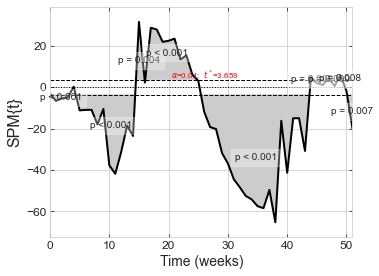

In [24]:
# demonstration
spm = spmtest(dfs['2020', freq][['athlete', variables[0]]].pivot(columns='athlete')[variables[0]].T,
              dfs['2019', freq][['athlete', variables[0]]].pivot(columns='athlete')[variables[0]].T)
spmi = spm.inference(alpha, two_tailed=two_tailed)
print(spmi)
# print(snpmi.clusters)

ax = plt.axes((0.55, 0.15, 0.7, 0.8))
spmi.plot()
spmi.plot_threshold_label(fontsize=8)
spmi.plot_p_values(size=10)
ax.set_xlabel('Time (weeks)')
plt.show()

In [25]:
spmi = dict()
for var in variables:
    spm = spmtest(dfs['2020', freq][['athlete', var]].pivot(columns='athlete')[var].T,
                  dfs['2019', freq][['athlete', var]].pivot(columns='athlete')[var].T)
    spmi[freq, var] = spm.inference(alpha=alpha, two_tailed=two_tailed)
    for gender in genders:
        for age in ages:
            idx = (dfs['2020', freq]['gender']==gender) & (dfs['2020', freq]['age_group']==age)
            spm = spmtest(dfs['2020', freq][idx][['athlete', var]].pivot(columns='athlete')[var].T,
                          dfs['2019', freq][idx][['athlete', var]].pivot(columns='athlete')[var].T)
            spmi[freq, gender, age, var] = spm.inference(alpha=alpha, two_tailed=two_tailed)   

### Plots

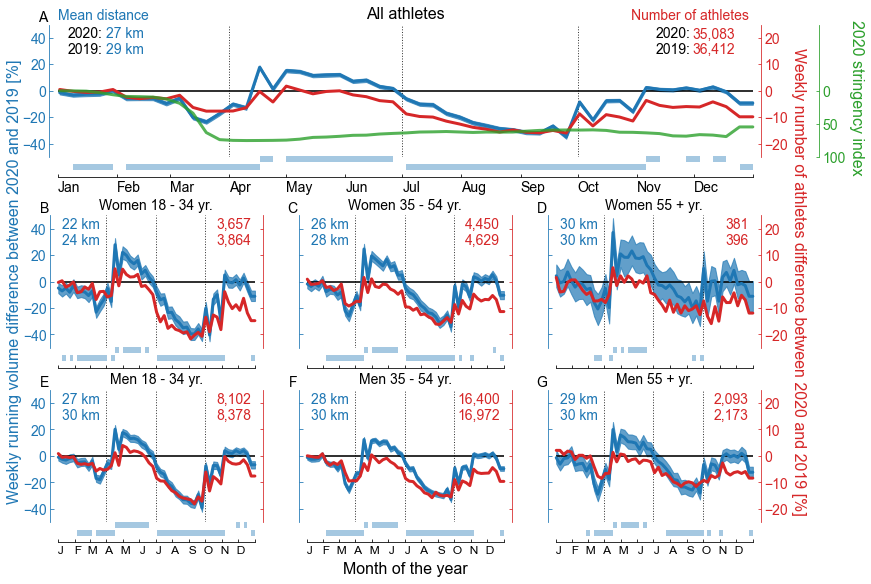

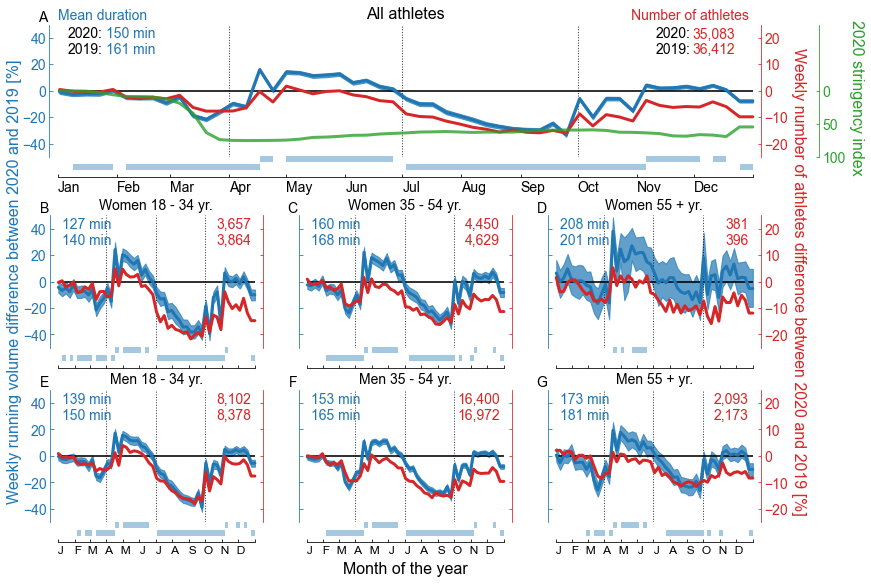

In [26]:
def repeat_last(df, freq):
    """Repeat last point in data for plotting.
    """    
    x = df.iloc[-1]
    if freq == 'w':
        x.name = x.name + 7
        df = df.append(x)
        t = df.index
    elif freq == 'm':
        x.name = x.name + 31
        df = df.append(x)
        t = df.index - 31
    return t, df


def plot(ax, axb, freq, df, n, c1=c1, c2=c2):
    """General plot.
    """
    t, df = repeat_last(df, freq)
    n = np.r_[n, n[-1]]
    ax.fill_between(t, df['ci_inf'], df['ci_sup'],
                    color=c1, alpha=.7, clip_on=False)  # , step='post'
    sns.lineplot(x=t, y=df['m'], color=c1, ci=None, alpha=1, 
                 legend=False, lw=3, ax=ax, clip_on=False) # , drawstyle='steps-post'
    axb.plot(t, n, color=c2, lw=3, alpha=1, clip_on=False)  # , drawstyle='steps-post'


weight = 'normal'
x = days

for v, var in enumerate(variables):
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    gs = fig.add_gridspec(3, 3)
    ax0 = fig.add_subplot(gs[0, :])
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[1, 1])
    ax3 = fig.add_subplot(gs[1, 2])
    ax4 = fig.add_subplot(gs[2, 0])
    ax5 = fig.add_subplot(gs[2, 1])
    ax6 = fig.add_subplot(gs[2, 2])
    ax0b = ax0.twinx()  # ax0.get_shared_x_axes().get_siblings(ax0)[7]

    ax0.axvline(x[3], c=c3, alpha=.8, ls=':', lw=1)
    ax0.axvline(x[6], c=c3, alpha=.8, ls=':', lw=1)
    ax0.axvline(x[9], c=c3, alpha=.8, ls=':', lw=1)
    ax0.axhline(0, c=c3, alpha=.8, lw=2)

    if 1:
        plot(ax0, ax0b, freq, dfscid[freq, var], nathletesd[freq, var].values, c1, c2)
    else:
        width = 4
        t = dfscid[freq, var].index
        #yerr = np.diff(ci, axis=0).flatten() * norm[days].values/2
        ax0.bar(t - width/2, dfscid[freq, var]['m'], width=width, linewidth=0, color=c1)
        ax0b.bar(t + width/2, r_a, width=width, linewidth=0, color=c2)

    # plot coronavirus policy response index
    ax0c = ax0.twinx()
    c19idx.index = dfscid[freq, var].index
    t, c19idx2 = repeat_last(c19idx, freq)
    ax0c.plot(t, c19idx2['si_w'], color=c4, alpha=.8, 
              lw=3, ls='-', clip_on=False)
    ax0c.set_ylim([100, -100])
    ax0c.set_yticks([0, 50, 100])    

    # spm1d plot
    # lines stretches from lineoffset - linelength/2 to lineoffset + linelength/2
    if freq == 'd':
        factor = 1
    elif freq == 'w':
        factor = 7
    elif freq == 'm':
        factor = 31
    s2020 = np.where(spmi[freq, var].z > spmi[freq, var].zstar)[0] 
    s2020 = (t[s2020] + factor/2, ) 
    s2019 = np.where(spmi[freq, var].z < -spmi[freq, var].zstar)[0]
    s2019 = (t[s2019] + factor/2, ) 
    ax0.eventplot(-np.ones_like(s2020)*52, colors=c1, lineoffsets=s2020,
                  linelengths=[factor], orientation='vertical',
                  linewidth=6, alpha=0.4, clip_on=False)
    ax0.eventplot(-np.ones_like(s2019)*58, colors=c1, lineoffsets=s2019,
                  linelengths=[factor], orientation='vertical',
                  linewidth=6, alpha=0.4, clip_on=False)

    axes = np.array([[ax1, ax2, ax3], [ax4, ax5, ax6]])
    axesb = np.empty_like(axes)
    letters = np.array([['B', 'C', 'D'], ['E', 'F', 'G']])
    for g, gender in enumerate(genders):
        for a, age in enumerate(ages):
            axesb[g, a] = axes[g, a].twinx()
            axes[g, a].axvline(x[3], c=c3, alpha=.8, ls=':', lw=1)
            axes[g, a].axvline(x[6], c=c3, alpha=.8, ls=':', lw=1)
            axes[g, a].axvline(x[9], c=c3, alpha=.8, ls=':', lw=1)
            axes[g, a].axhline(0, c=c3, alpha=.8, lw=2)
            plot(axes[g, a], axesb[g, a], freq, dfscid[freq, gender, age, var],
                  nathletesd[freq, gender, age, var].values, c1, c2)
            # spm1d plot
            # lines stretches from lineoffset - linelength/2 to lineoffset + linelength/2
            s2020 = np.where(spmi[freq, gender, age, var].z >
                             spmi[freq, gender, age, var].zstar)[0] 
            s2020 = (t[s2020] + factor/2, ) 
            s2019 = np.where(spmi[freq, gender, age, var].z <
                             -spmi[freq, gender, age, var].zstar)[0]
            s2019 = (t[s2019] + factor/2, )    
            axes[g, a].eventplot(-np.ones_like(s2020)*52, colors=c1, lineoffsets=s2020,
                                 linelengths=[factor], orientation='vertical',
                                 linewidth=6, alpha=0.4, clip_on=False)
            axes[g, a].eventplot(-np.ones_like(s2019)*58, colors=c1, lineoffsets=s2019,
                                 linelengths=[factor], orientation='vertical',
                                 linewidth=6, alpha=0.4, clip_on=False)
            # aesthetics
            axes[g, a].text(-.045, 1.025, letters[g, a], ha='right', weight=weight,
                            fontsize=14, c='k', transform=axes[g, a].transAxes)
            axes[g, a].text(0.02, .9, '{:.0f} {}'.format(np.round(estimate(
                            dfsci['2020', freq, gender, age, var]['m']), 0), units[v]),
                            ha='left', weight=weight, fontsize=14, c=c1,
                            transform=axes[g, a].transAxes)
            axes[g, a].text(.98, .9, '{:,}'.format(nruns['2020', freq, gender, age].size),
                            ha='right', weight=weight, fontsize=14, c=c2,
                            transform=axes[g, a].transAxes)
            axes[g, a].text(0.02, .78, '{:.0f} {}'.format(np.round(estimate(
                            dfsci['2019', freq, gender,age, var]['m']), 0), units[v]),
                            ha='left', weight=weight, fontsize=14, c=c1,
                            transform=axes[g, a].transAxes)
            axes[g, a].text(.98, .78, '{:,}'.format(nruns['2019', freq, gender, age].size),
                            ha='right', weight=weight, fontsize=14, c=c2,
                            transform=axes[g, a].transAxes)
            gender2 = 'Women' if gender == 'F' else 'Men'
            age2 = age + ' yr.'
            axes[g, a].set_title('{} {}'.format(gender2, age2), fontsize=14,
                                 c=c3, ha='center', y=1)
            axes[g, a].set_xticks(x)
            if g == 0:
                axes[g, a].set_xticklabels([])
            if g == 1:
                labels = ['  ' + m[0] for m in months]
                labels.append('')
                axes[g, a].set_xticklabels(labels, rotation=0, fontsize=14, ha='left')
            if a == 0:
                axes[g, a].set_ylabel('')
                #axesb[g, a].axes.get_yaxis().set_visible(False)
            if a > 0:
                axes[g, a].set_yticklabels([])
                axes[g, a].set_ylabel('')
                #axes[g, a].spines['left'].set_visible(False)
            if a == 1:
                #axes[g, a].axes.get_yaxis().set_visible(False)
                #axesb[g, a].axes.get_yaxis().set_visible(False)
                pass
            if a == 2:
                #axes[g, a].axes.get_yaxis().set_visible(False)
                pass
            if a < 2:
                axesb[g, a].set_yticklabels([])
                axesb[g, a].set_ylabel('')
                #axesb[g, a].spines['right'].set_visible(False)
            if g == 1 & a == 1:
                axes[g, a].set_xlabel('Month of the year', c=c3, fontsize=16)
                axes[g, a].xaxis.set_label_coords(.5, -.3)
            else:
                axes[g, a].set_xlabel('')

            axes[g, a].tick_params(axis='x', colors=c3)
            axes[g, a].spines['right'].set_visible(False)
            axes[g, a].spines['top'].set_visible(False)
            axesb[g, a].spines['bottom'].set_visible(False)
            axesb[g, a].spines['left'].set_visible(False)
            axesb[g, a].spines['top'].set_visible(False)
            axes[g, a].spines['bottom'].set_color(c3)
            axes[g, a].spines['left'].set_color(c1)
            axes[g, a].tick_params(axis='y', colors=c1)
            axesb[g, a].spines['right'].set_color(c2)
            axesb[g, a].tick_params(axis='y', colors=c2)
            axes[g, a].spines['bottom'].set_position(('axes', -0.15))
            axes[g, a].spines['left'].set_position(('axes', -0.04))
            axesb[g, a].spines['right'].set_position(('axes', 1.04))
            axes[g, a].xaxis.set_ticks_position('bottom')
            axes[g, a].yaxis.set_ticks_position('left')
            axesb[g, a].xaxis.set_ticks_position('bottom')
            axesb[g, a].yaxis.set_ticks_position('right')   
            axes[g, a].tick_params(axis='y', which='major', labelsize=14)
            axesb[g, a].tick_params(axis='y', which='major', labelsize=14)

    ax0.set_ylabel('')
    ax0.set_xlabel('')
    ax0.xaxis.set_ticks_position('bottom')
    ax0.spines['bottom'].set_color(c3)
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['left'].set_color(c1)
    ax0.tick_params(axis='x', colors=c3)
    ax0.tick_params(axis='y', colors=c1)
    ax0.spines['left'].set_position(('axes', -0.012))
    ax0.spines['bottom'].set_position(('axes', -0.15))

    ax0b.spines['bottom'].set_visible(False)
    ax0b.spines['top'].set_visible(False)
    ax0b.spines['left'].set_visible(False)
    ax0b.spines['right'].set_color(c2)
    ax0b.spines['right'].set_position(('axes', 1.012))
    ax0b.tick_params(axis='y', colors=c2)

    ax0c.spines['bottom'].set_visible(False)
    ax0c.spines['top'].set_visible(False)
    ax0c.spines['left'].set_visible(False)
    ax0c.spines['right'].set_color(c4)
    ax0c.spines['right'].set_position(('axes', 1.095))
    ax0c.tick_params(axis='y', colors=c4)
    ax0c.tick_params(axis='both', which='major', labelsize=14)
    ax0c.set_ylabel('2020 stringency index', rotation=-90, color=c4, fontsize=16)
    ax0c.yaxis.set_label_coords(1.16, .45)
    ax0c.grid(False, axis='both')

    ax0.set_title('All athletes', fontsize=16, c=c3, ha='center')
    ax0.text(.065, 1.04, 'Mean {}'.format(var), ha='center', weight=weight,
             fontsize=14, c=c1, transform=ax0.transAxes)
    ax0.text(.91, 1.04, 'Number of athletes', ha='center', weight=weight,
             fontsize=14, c=c2, transform=ax0.transAxes)
    ax0.text(-.0155, 1.025, 'A', ha='right', weight=weight,
             fontsize=14, c='k', transform=ax0.transAxes)
    ax0.text(0.014, .9, '2020:', ha='left', weight=weight,
             fontsize=14, c=c3, transform=ax0.transAxes)
    ax0.text(0.07, .9, '{:.0f} {}'.format(
        np.round(estimate(dfsci['2020', freq, var]['m']), 0), units[v]),
             ha='left', weight=weight, fontsize=14, c=c1, transform=ax0.transAxes)
    ax0.text(0.91, .9, '2020:', ha='right', weight=weight,
             fontsize=14, c=c3, transform=ax0.transAxes)
    ax0.text(.975, .9,  '{:,}'.format(nruns['2020', 'd'].size), ha='right', weight=weight,
             fontsize=14, c=c2, transform=ax0.transAxes)
    ax0.text(0.014, .78, '2019:', ha='left', weight=weight,
             fontsize=14, c=c3, transform=ax0.transAxes)
    ax0.text(0.07, .78, '{:.0f} {}'.format(
             np.round(estimate(dfsci['2019', freq, var]['m']), 0), units[v]),
             ha='left', weight=weight, fontsize=14, c=c1, transform=ax0.transAxes)
    ax0.text(0.91, .78, '2019:', ha='right', weight=weight,
             fontsize=14, c=c3, transform=ax0.transAxes)
    ax0.text(.975, .78, '{:,}'.format(nruns['2019', 'd'].size), ha='right', weight=weight,
             fontsize=14, c=c2, transform=ax0.transAxes)

    if freq == 'd':
        sfrq = 'Daily'
    elif freq == 'w':
        sfrq = 'Weekly'
    elif freq == 'm':
        sfrq = 'Monthly'
    text = '{} running volume difference between 2020 and 2019 [%]'.format(sfrq)
    #text = sfrq + ' running volume $\mathregular{(V_{2020}-V_{2019})\:/\:\overline{V_{2019}}}$  [%]'
    ax1.set_ylabel(text, color=c1, fontsize=16)
    ax1.yaxis.set_label_coords(-.18, .5)
    text = '{} number of athletes difference between 2020 and 2019 [%]'.format(sfrq)
    #text = sfrq + ' number of athletes $\mathregular{(N_{2020}-N_{2019})\:/\:\overline{N_{2019}}}$  [%]'
    axesb[0, 2].set_ylabel(text, rotation=-90, color=c2, fontsize=16)
    axesb[0, 2].yaxis.set_label_coords(1.27, .5)
    ax0.tick_params(axis='both', which='major', labelsize=14)
    ax0b.tick_params(axis='both', which='major', labelsize=14)
    ax0.set_xticks(x)
    labels = [m[0:3] for m in months]
    labels.append('')
    ax0.set_xticklabels(labels, rotation=0, fontsize=14, ha='left')

    axes2 = np.r_[ax0, ax1, ax2, ax3, ax4, ax5, ax6]
    axesb2 = np.r_[ax0b, axesb.flatten()]
    for ax, axb in zip(axes2, axesb2):
        ax.grid(False, axis='both')
        axb.grid(False, axis='both')
        ax.set_xlim([0, 365])
        ax.set_ylim([-50, 50])
        ax.set_yticks([-40, -20, 0, 20, 40])
        axb.set_ylim([-25, 25])
        axb.set_yticks([-20, -10, 0, 10, 20])
    fig.savefig(os.path.join(path2, 'figure{}_{}.svg'.format(v, var)), dpi=600)
    fig.savefig(os.path.join(path2, 'figure{}_{}.png'.format(v, var)), dpi=600)
    plt.show()

#### Infographic

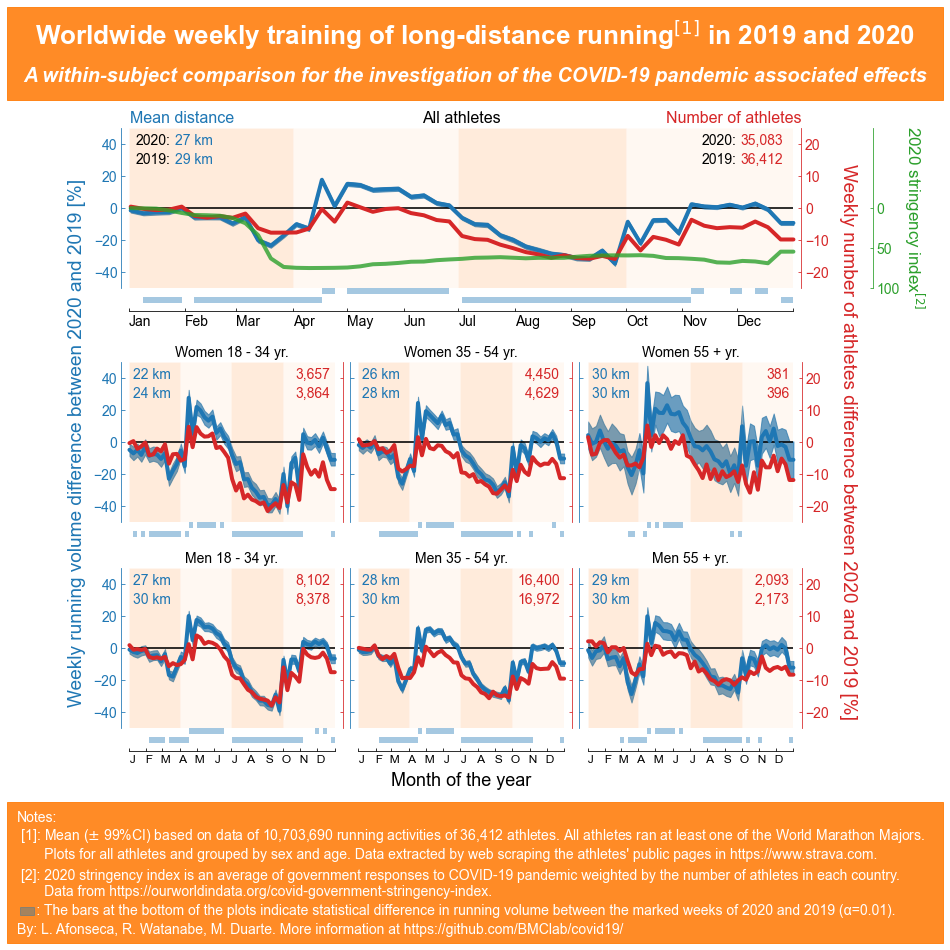

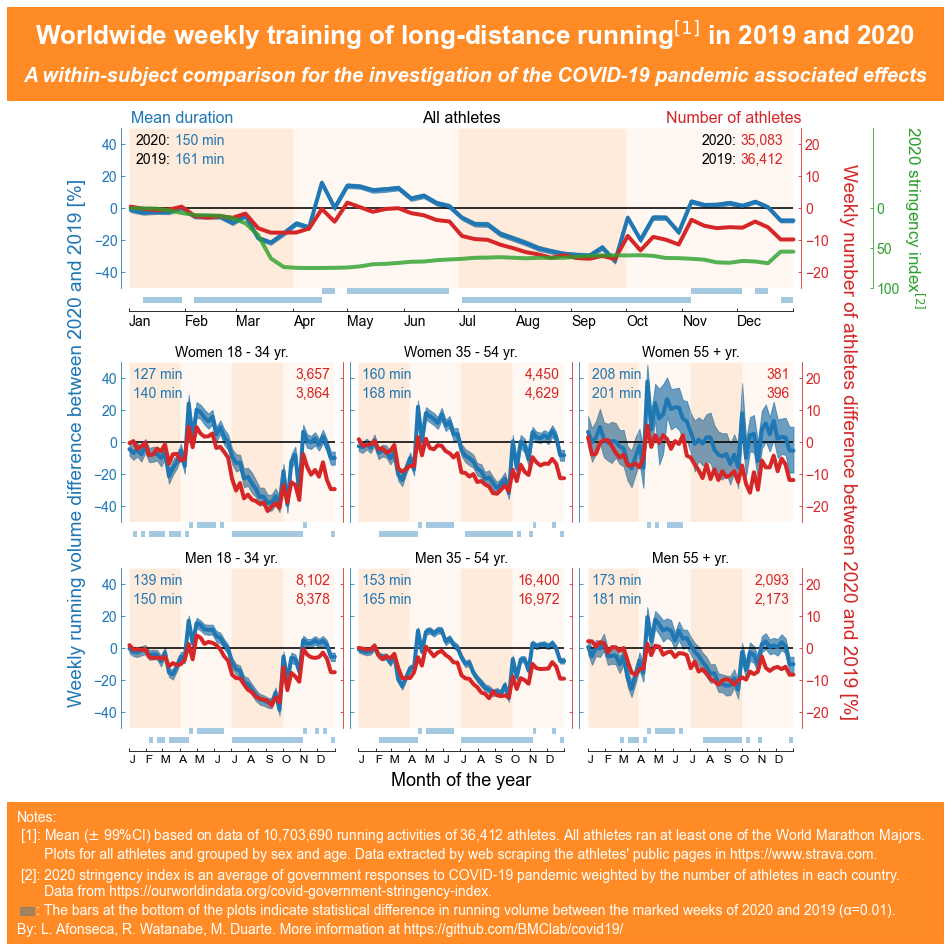

In [27]:
def repeat_last(df, freq):
    """Repeat last point in data for plotting.
    """    
    x = df.iloc[-1]
    if freq == 'w':
        x.name = x.name + 7
        df = df.append(x)
        t = df.index
    elif freq == 'm':
        x.name = x.name + 31
        df = df.append(x)
        t = df.index - 31
    return t, df


def plot(ax, axb, freq, df, n, c1=c1, c2=c2):
    """General plot.
    """
    t, df = repeat_last(df, freq)
    n = np.r_[n, n[-1]]
    ax.fill_between(t, df['ci_inf'], df['ci_sup'],
                    color=c1, alpha=.7, clip_on=False)  # , step='post'
    sns.lineplot(x=t, y=df['m'], color=c1, ci=None, alpha=1, 
                 legend=False, lw=4, ax=ax, clip_on=False) # , drawstyle='steps-post'
    axb.plot(t, n, color=c2, lw=4, alpha=1, clip_on=False)  # , drawstyle='steps-post'


weight = 'normal'
x = days

for v, var in enumerate(variables):
    fig = plt.figure(constrained_layout=False, figsize=(13, 13))
    gs = fig.add_gridspec(3, 3)
    ax0 = fig.add_subplot(gs[0, :])
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[1, 1])
    ax3 = fig.add_subplot(gs[1, 2])
    ax4 = fig.add_subplot(gs[2, 0])
    ax5 = fig.add_subplot(gs[2, 1])
    ax6 = fig.add_subplot(gs[2, 2])
    ax0b = ax0.twinx()  # ax0.get_shared_x_axes().get_siblings(ax0)[7]
    ax0c = ax0.twinx()

    #ax0.axvline(x[3], c=c3, alpha=.8, ls=':', lw=1)
    #ax0.axvline(x[6], c=c3, alpha=.8, ls=':', lw=1)
    #ax0.axvline(x[9], c=c3, alpha=.8, ls=':', lw=1)
    ax0.axvspan(x[0], x[3], fc=c5, alpha=0.15)
    ax0.axvspan(x[3], x[6], fc=c5, alpha=0.05)
    ax0.axvspan(x[6], x[9], fc=c5, alpha=0.15)
    ax0.axvspan(x[9], x[12], fc=c5, alpha=0.05)
    ax0.axhline(0, c=c3, alpha=.8, lw=2)

    if 1:
        plot(ax0, ax0b, freq, dfscid[freq, var], nathletesd[freq, var].values, c1, c2)
    else:
        width = 4
        t = dfscid[freq, var].index
        #yerr = np.diff(ci, axis=0).flatten() * norm[days].values/2
        ax0.bar(t - width/2, dfscid[freq, var]['m'], width=width, linewidth=0, color=c1)
        ax0b.bar(t + width/2, r_a, width=width, linewidth=0, color=c2)

    # plot coronavirus policy response index
    c19idx.index = dfscid[freq, var].index
    t, c19idx2 = repeat_last(c19idx, freq)
    ax0c.plot(t, c19idx2['si_w'], color=c4, alpha=.8, 
              lw=4, ls='-', clip_on=False)
    ax0c.set_ylim([100, -100])
    ax0c.set_yticks([0, 50, 100])    

    # spm1d plot
    # lines stretches from lineoffset - linelength/2 to lineoffset + linelength/2
    if freq == 'd':
        factor = 1
    elif freq == 'w':
        factor = 7
    elif freq == 'm':
        factor = 31
    s2020 = np.where(spmi[freq, var].z > spmi[freq, var].zstar)[0] 
    s2020 = (t[s2020] + factor/2, ) 
    s2019 = np.where(spmi[freq, var].z < -spmi[freq, var].zstar)[0]
    s2019 = (t[s2019] + factor/2, ) 
    ax0.eventplot(-np.ones_like(s2020)*52, colors=c1, lineoffsets=s2020,
                  linelengths=[factor], orientation='vertical',
                  linewidth=6, alpha=0.4, clip_on=False)
    ax0.eventplot(-np.ones_like(s2019)*58, colors=c1, lineoffsets=s2019,
                  linelengths=[factor], orientation='vertical',
                  linewidth=6, alpha=0.4, clip_on=False)

    axes = np.array([[ax1, ax2, ax3], [ax4, ax5, ax6]])
    axesb = np.empty_like(axes)
    letters = np.array([['B', 'C', 'D'], ['E', 'F', 'G']])
    for g, gender in enumerate(genders):
        for a, age in enumerate(ages):
            axesb[g, a] = axes[g, a].twinx()
            #axes[g, a].axvline(x[3], c=c3, alpha=.8, ls=':', lw=1)
            #axes[g, a].axvline(x[6], c=c3, alpha=.8, ls=':', lw=1)
            #axes[g, a].axvline(x[9], c=c3, alpha=.8, ls=':', lw=1)
            axes[g, a].axvspan(x[0], x[3], fc=c5, alpha=0.15)
            axes[g, a].axvspan(x[3], x[6], fc=c5, alpha=0.05)
            axes[g, a].axvspan(x[6], x[9], fc=c5, alpha=0.15)
            axes[g, a].axvspan(x[9], x[12], fc=c5, alpha=0.05)
            axes[g, a].axhline(0, c=c3, alpha=.8, lw=2)
            plot(axes[g, a], axesb[g, a], freq, dfscid[freq, gender, age, var],
                 nathletesd[freq, gender, age, var].values, c1, c2)
            # spm1d plot
            # lines stretches from lineoffset - linelength/2 to lineoffset + linelength/2
            s2020 = np.where(spmi[freq, gender, age, var].z >
                             spmi[freq, gender, age, var].zstar)[0] 
            s2020 = (t[s2020] + factor/2, ) 
            s2019 = np.where(spmi[freq, gender, age, var].z <
                             -spmi[freq, gender, age, var].zstar)[0]
            s2019 = (t[s2019] + factor/2, )    
            axes[g, a].eventplot(-np.ones_like(s2020)*52, colors=c1, lineoffsets=s2020,
                                 linelengths=[factor], orientation='vertical',
                                 linewidth=6, alpha=0.4, clip_on=False)
            axes[g, a].eventplot(-np.ones_like(s2019)*58, colors=c1, lineoffsets=s2019,
                                 linelengths=[factor], orientation='vertical',
                                 linewidth=6, alpha=0.4, clip_on=False)
            # aesthetics
            #axes[g, a].text(-.04, 1.02, letters[g, a], ha='right', weight=weight,
            #                fontsize=16, c='k', transform=axes[g, a].transAxes)
            axes[g, a].text(0.02, .9, '{:.0f} {}'.format(np.round(estimate(
                            dfsci['2020', freq, gender, age, var]['m']), 0), units[v]),
                            ha='left', weight=weight, fontsize=14, c=c1,
                            transform=axes[g, a].transAxes)
            axes[g, a].text(.98, .9, '{:,}'.format(nruns['2020', freq, gender, age].size),
                            ha='right', weight=weight, fontsize=14, c=c2,
                            transform=axes[g, a].transAxes)
            axes[g, a].text(0.02, .78, '{:.0f} {}'.format(np.round(estimate(
                            dfsci['2019', freq, gender, age, var]['m']), 0), units[v]),
                            ha='left', weight=weight, fontsize=14, c=c1,
                            transform=axes[g, a].transAxes)
            axes[g, a].text(.98, .78, '{:,}'.format(nruns['2019', freq, gender, age].size),
                            ha='right',  weight=weight, fontsize=14, c=c2,
                            transform=axes[g, a].transAxes)
            gender2 = 'Women' if gender == 'F' else 'Men'
            age2 = age + ' yr.'
            axes[g, a].set_title('{} {}'.format(gender2, age2), fontsize=14,
                                 c=c3, ha='center', y=1)
            axes[g, a].set_xticks(x)
            if g == 0:
                axes[g, a].axes.get_xaxis().set_visible(False)
                axes[g, a].spines['bottom'].set_visible(False)
                axes[g, a].set_xticklabels([])
            if g == 1:
                labels = ['  ' + m[0] for m in months]
                labels.append('')
                axes[g, a].set_xticklabels(labels, rotation=0, fontsize=14, ha='left')
            if a == 0:
                axes[g, a].set_ylabel('')
                #axesb[g, a].axes.get_yaxis().set_visible(False)
            if a > 0:
                axes[g, a].set_yticklabels([])
                axes[g, a].set_ylabel('')
                #axes[g, a].spines['left'].set_visible(False)
            if a == 1:
                #axes[g, a].axes.get_yaxis().set_visible(False)
                #axesb[g, a].axes.get_yaxis().set_visible(False)
                pass
            if a == 2:
                #axes[g, a].axes.get_yaxis().set_visible(False)
                pass
            if a < 2:
                axesb[g, a].set_yticklabels([])
                axesb[g, a].set_ylabel('')
                #axesb[g, a].spines['right'].set_visible(False)
            if g == 1 & a == 1:
                axes[g, a].set_xlabel('Month of the year', c=c3, fontsize=18)
                axes[g, a].xaxis.set_label_coords(.5, -.28)
            else:
                axes[g, a].set_xlabel('')

            axes[g, a].tick_params(axis='x', colors=c3)
            axes[g, a].spines['right'].set_visible(False)
            axes[g, a].spines['top'].set_visible(False)
            axesb[g, a].spines['bottom'].set_visible(False)
            axesb[g, a].spines['left'].set_visible(False)
            axesb[g, a].spines['top'].set_visible(False)
            axes[g, a].spines['bottom'].set_color(c3)
            axes[g, a].spines['left'].set_color(c1)
            axes[g, a].tick_params(axis='y', colors=c1)
            axesb[g, a].spines['right'].set_color(c2)
            axesb[g, a].tick_params(axis='y', colors=c2)
            axes[g, a].spines['bottom'].set_position(('axes', -0.15))
            axes[g, a].spines['left'].set_position(('axes', -0.04))
            axesb[g, a].spines['right'].set_position(('axes', 1.04))
            axes[g, a].xaxis.set_ticks_position('bottom')
            axes[g, a].yaxis.set_ticks_position('left')
            axesb[g, a].xaxis.set_ticks_position('bottom')
            axesb[g, a].yaxis.set_ticks_position('right')   
            axes[g, a].tick_params(axis='y', which='major', labelsize=14)
            axesb[g, a].tick_params(axis='y', which='major', labelsize=14)

    ax0.set_ylabel('')
    ax0.set_xlabel('')
    ax0.xaxis.set_ticks_position('bottom')
    ax0.spines['bottom'].set_color(c3)
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['left'].set_color(c1)
    ax0.tick_params(axis='x', colors=c3)
    ax0.tick_params(axis='y', colors=c1)
    ax0.spines['left'].set_position(('axes', -0.012))
    ax0.spines['bottom'].set_position(('axes', -0.15))

    ax0b.spines['bottom'].set_visible(False)
    ax0b.spines['top'].set_visible(False)
    ax0b.spines['left'].set_visible(False)
    ax0b.spines['right'].set_color(c2)
    ax0b.spines['right'].set_position(('axes', 1.012))
    ax0b.tick_params(axis='y', colors=c2)

    ax0c.spines['bottom'].set_visible(False)
    ax0c.spines['top'].set_visible(False)
    ax0c.spines['left'].set_visible(False)
    ax0c.spines['right'].set_color(c4)
    ax0c.spines['right'].set_position(('axes', 1.12))
    ax0c.tick_params(axis='y', colors=c4)
    ax0c.tick_params(axis='both', which='major', labelsize=14)
    ax0c.set_ylabel('2020 stringency index$^{[2]}$', rotation=-90, color=c4, fontsize=17)
    ax0c.yaxis.set_label_coords(1.2, .44)
    ax0c.grid(False, axis='both')

    ax0.set_title('All athletes', fontsize=16, c=c3, ha='center')
    #ax0.text(-.015, 1.02, 'A', ha='right', weight=weight,
    #         fontsize=16, c='k', transform=ax0.transAxes)
    ax0.text(.08, 1.04, 'Mean {}'.format(var), ha='center', weight=weight,
             fontsize=16, c=c1, transform=ax0.transAxes)
    ax0.text(.91, 1.04, 'Number of athletes', ha='center', weight=weight,
             fontsize=16, c=c2, transform=ax0.transAxes)
    ax0.text(0.01, .9, '2020:', ha='left', weight=weight,
             fontsize=14, c=c3, transform=ax0.transAxes)
    #ax0.text(0.055, .91, '$\mathregular{\overline{V}}$', 
    #         ha='left', weight=weight, fontsize=14, c=c1, transform=ax0.transAxes)
    ax0.text(0.07, .9, '{:.0f} {}'.format(
             np.round(estimate(dfsci['2020', freq, var]['m']), 0), units[v]),
             ha='left', weight=weight, fontsize=14, c=c1, transform=ax0.transAxes)
    ax0.text(0.915, .9, '2020:', ha='right', weight=weight,
             fontsize=14, c=c3, transform=ax0.transAxes)
    ax0.text(.985, .9,  '{:,}'.format(nruns['2020', 'd'].size), ha='right', weight=weight,
             fontsize=14, c=c2, transform=ax0.transAxes)
    ax0.text(0.01, .78, '2019:', ha='left', weight=weight,
             fontsize=14, c=c3, transform=ax0.transAxes)
    #ax0.text(0.055, .8, '$\mathregular{\overline{V}}$', 
    #         ha='left', weight=weight, fontsize=14, c=c1, transform=ax0.transAxes)
    ax0.text(0.07, .78, '{:.0f} {}'.format(
             np.round(estimate(dfsci['2019', freq, var]['m']), 0), units[v]),
             ha='left', weight=weight, fontsize=14, c=c1, transform=ax0.transAxes)
    ax0.text(0.915, .78, '2019:', ha='right', weight=weight,
             fontsize=14, c=c3, transform=ax0.transAxes)
    ax0.text(.985, .78, '{:,}'.format(nruns['2019', 'd'].size), ha='right', weight=weight,
             fontsize=14, c=c2, transform=ax0.transAxes)

    if freq == 'd':
        sfrq = 'Daily'
    elif freq == 'w':
        sfrq = 'Weekly'
    elif freq == 'm':
        sfrq = 'Monthly'
    text = '{} running volume difference between 2020 and 2019 [%]'.format(sfrq)
    #text = sfrq + ' running volume $\mathregular{(V_{2020}-V_{2019})\:/\:\overline{V_{2019}}}$  [%]'
    ax1.set_ylabel(text, color=c1, fontsize=19)
    ax1.yaxis.set_label_coords(-.21, .5)
    text = '{} number of athletes difference between 2020 and 2019 [%]'.format(sfrq)
    #text = sfrq + ' number of athletes $\mathregular{(N_{2020}-N_{2019})\:/\:\overline{N_{2019}}}$  [%]'
    axesb[0, 2].set_ylabel(text, rotation=-90, color=c2, fontsize=19)
    axesb[0, 2].yaxis.set_label_coords(1.31, .5)
    ax0.tick_params(axis='both', which='major', labelsize=14)
    ax0b.tick_params(axis='both', which='major', labelsize=14)
    ax0.set_xticks(x)
    labels = [m[0:3] for m in months]
    labels.append('')
    ax0.set_xticklabels(labels, rotation=0, fontsize=14, ha='left')

    axes2 = np.r_[ax0, ax1, ax2, ax3, ax4, ax5, ax6]
    axesb2 = np.r_[ax0b, axesb.flatten()]
    for ax, axb in zip(axes2, axesb2):
        ax.grid(False, axis='both')
        axb.grid(False, axis='both')
        ax.set_xlim([0, 365])
        ax.set_ylim([-50, 50])
        ax.set_yticks([-40, -20, 0, 20, 40])
        axb.set_ylim([-25, 25])
        axb.set_yticks([-20, -10, 0, 10, 20])
        #ax.patch.set_facecolor([.9, .9, .9])

    #title = 'Worldwide weekly training of long distance running$^{[1]}$ in 2019 and 2020\n' + \
    #        '— Associated effects of the COVID-19 pandemic —'
    #fig.suptitle(title, color='w', fontsize=25, weight='semibold', x=.51, y=.985)

    text = ['Worldwide weekly training of long-distance running$^{[1]}$ in 2019 and 2020']
    fig.text(0.5, .96, text[0], fontsize=26, color='w', weight='semibold',
             horizontalalignment='center')
    text = ['A within-subject comparison for the investigation of the COVID-19 pandemic associated effects']
    fig.text(0.5, .92, text[0], fontsize=20, color='w', weight='semibold',
             style='italic', horizontalalignment='center')


    #ax = fig.add_axes([0, 0.92, 1, .1])
    #ax.xaxis.set_visible(False)
    #ax.yaxis.set_visible(False)
    #ax.set_zorder(0)
    #ax.patch.set_alpha(0.5)
    #ax.patch.set_color([.2, .2, .2])

    fig.patches.extend([plt.Rectangle((0, .9), 1, .1, color=c5, fill=True, alpha=.9,
                                      zorder=0, transform=fig.transFigure, figure=fig)])
    fig.patches.extend([plt.Rectangle((0, 0), 1, .15, color=c5, fill=True, alpha=.9,
                                      zorder=0, transform=fig.transFigure, figure=fig)])
    fig.patches.extend([plt.Rectangle((0.014, 0.03), .015, .008, color=c1,
                                      fill=True, alpha=.4,
                                      zorder=10, transform=fig.transFigure, figure=fig)])

    fig.text(0.01, .13, 'Notes:', fontsize=14, color='w', weight='normal')
    text = [' [1]: Mean ($\pm$ 99%CI) based on data of 10,703,690 running activities of 36,412 athletes.' +
            ' All athletes ran at least one of the World Marathon Majors.']
    fig.text(0.01, .11, text[0], fontsize=14, color='w', alpha=1, weight='normal')        
    text = ['       Plots for all athletes and grouped by sex and age.' +
            ' Data extracted by web scraping the athletes\' public pages in' +
            ' https://www.strava.com.']
    fig.text(0.01, .09, text[0], fontsize=14, color='w', alpha=1, weight='normal')
    text = [' [2]: 2020 stringency index is an average of government responses to' +
            ' COVID-19 pandemic weighted by the number of athletes in each country.\n' +
            '       Data from https://ourworldindata.org/covid-government-stringency-index.']
    fig.text(0.01, .05, text[0], fontsize=14, color='w', alpha=1, weight='normal')
    text = ['     : The bars at the bottom of the plots indicate statistical ' +
            'difference in running volume between the marked weeks of 2020 and 2019 (α=0.01).']
    fig.text(0.01, .03, text[0], fontsize=14, color='w', alpha=1, weight='normal')
    text = ['By: L. Afonseca, R. Watanabe, M. Duarte.' +
            ' More information at https://github.com/BMClab/covid19/']
    fig.text(0.01, .01, text[0], fontsize=14, color='w', weight='normal')

    #ax0.text(.01, -.1, '[3]', ha='right', weight='normal', fontsize=16, c=c1, transform=ax0.transAxes)

    axes2[0].set_position([0.13, 0.70, 0.71, 0.17])
    axes2[1].set_position([0.13, 0.45, 0.22, 0.17])
    axes2[2].set_position([0.375, 0.45, 0.22, 0.17])
    axes2[3].set_position([0.62, 0.45, 0.22, 0.17])
    axes2[4].set_position([0.13, 0.23, 0.22, 0.17])
    axes2[5].set_position([0.375, 0.23, 0.22, 0.17])
    axes2[6].set_position([0.62, 0.23, 0.22, 0.17])

    #fig.patch.set_facecolor([.9, .9, .9])
    #fig.patch.set_edgecolor([.2, .2, .2])
    #fig.patch.set_linewidth(5)

    fig.savefig(os.path.join(path2, 'infographic_{}.svg'.format(var)), dpi=600)
    fig.savefig(os.path.join(path2, 'infographic_{}.png'.format(var)), dpi=600)
    plt.show()